<a href="https://colab.research.google.com/github/shaafi56/-Classifying-Somali-News-into-International-and-Local-Categories-using-NLP-Text-Classification/blob/main/update_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Sumarization
# Text Cleaning
# Sentence Tokenization
# Wrod Tokenization
# Stopwords
# Word Frequency Table
# Summarization

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
!pip install WordCloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#load the dataset
df = pd.read_excel("/content/cleaned_somali_text.xlsx")
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['WARBIXINTA']
print(df.head())
print(df['WARBIXINTA'].value_counts())

(-0.5, 799.5, 399.5, -0.5)

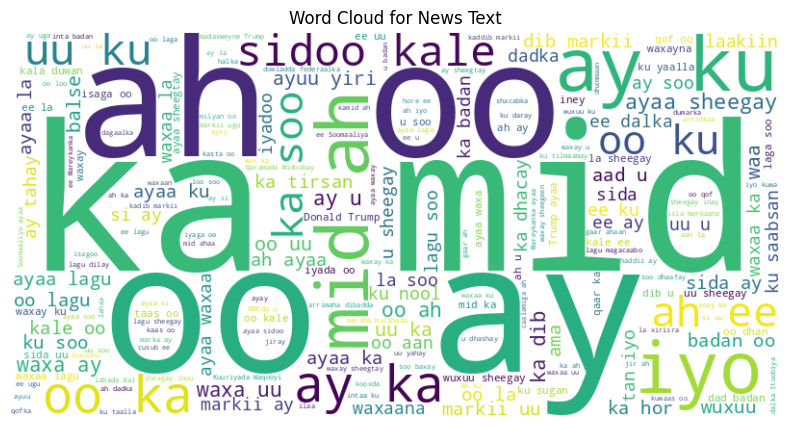

In [53]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['WARBIXINTA']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for News Text')
plt.axis('off')

In [51]:
# Tokenization
df['Tokenized_Text'] = df['WARBIXINTA'].apply(lambda x: word_tokenize(x))

In [52]:
# Stopword Removal
#stop_words = ['waa', 'waana', 'waan', 'ah', 'oo', 'ee', 'waxey', 'ugu', 'waxa','eey', 'iyo', 'aad', 'baan', 'u', 'leh', 'beey', 'ahna', 'tiq', 'sidoo', 'kalena', 'laakiin','ay','is','ayaa', 'isku', 'ka',  'ku', 'lagu', 'ayay',  'ayuu', 'inuu', 'inaa', 'si', 'laga', 'in', 'haya', 'haaya', 'intii', 'uu', 'ii', 'la', 'looga', 'Mar', 'kaliya', 'waxaa', 'loo']
stop_words = ['waa', 'waana', 'waan', 'ah', 'oo', 'ee', 'waxey', 'ugu', 'waxa',
             'eey', 'iyo', 'aad', 'baan', 'u', 'leh', 'yar', 'yaraaday', 'yarayd', 'yeesheen', 'yeeshee', 'beey', 'ahna', 'tiq', 'oo', 'yimid', 'yiri' 'Ku','ee' 'sidoo', 'kalena', 'laakiin',
             'yeeshay','yesheen', 'yaala', 'ay', 'yaabaa', 'yaabo', 'is', 'yare', 'yaab', 'yeesho', 'yareeyo','yeelatay','ayaa','isku', 'ka', 'ku', 'yiri','yimaadaan','yimaaday','yimaaday','yihiin', 'lagu', 'ayay',  'ayuu',
              'inuu', 'inaa', 'si', 'laga', 'in', 'yaryar','yaalla', 'yaal','yaalay', 'haya', 'haaya', 'intii', 'uu', 'ii', 'la', 'looga','mar','kaliya','loo','yahay','sida','soo']
df['Filtered_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
stopWords = list(stop_words)

In [30]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [33]:
nlp = spacy.load('en_core_web_sm')

In [61]:
doc = nlp(df['WARBIXINTA'][11])

In [64]:
docs = []
for i in range(len(df)):
  doc = nlp(df['WARBIXINTA'][i])
  docs.append(doc)

KeyboardInterrupt: 

In [ ]:
from string import punctuation
punctuation = punctuation + '\n'
punctuation

In [49]:
#words frequency are how many words are repetition
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stop_words:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1
print(word_frequencies)


{'Dadkan': 1, 'muhaajiriinta': 1, 'kala': 1, 'wadamada': 1, 'Honduras': 1, 'Guatemala': 1, 'El': 1, 'Salvador': 1, 'Sadax': 1, 'qof': 3, 'xiray': 1, 'shakisan': 1, 'inay': 2, 'dadkani': 1, 'safrinayeen': 1, 'kuwaasoo': 2, 'ahaa': 1, 'muqalasiin': 1, 'dadka': 1, 'safriya': 1, 'Bishii': 1, 'dhaafay': 1, 'waxaa': 1, 'sidoo': 1, 'kale': 1, 'qabtay': 1, 'dad': 1, 'badan': 1, 'boqol': 1, 'iyagana': 1, 'haajirayay': 1, 'Kumanaan': 1, 'safra': 1, 'dalka': 1, 'Maraykanka': 1, 'sharci': 1, 'laaan': 1, 'doonaya': 1, 'wadankaasi': 1, 'gallaan': 1}


# New Section